# Tensor란

In [ ]:
import torch

# 1D Tensor 생성
x = torch.tensor([1, 2, 3])
print(x)

# 2D Tensor 생성
y = torch.tensor([[1, 2], [3, 4]])
print(y)

# 랜덤 Tensor 생성
z = torch.rand(3, 3)  # 3x3 행렬
print(z)

# 라이브러리 Import

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Dataset & Dataloader

In [3]:
# 데이터 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# 데이터셋 다운로드 및 로드
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:29<00:00, 341kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.38MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.92MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# 신경망 모델 구조 정의

In [ ]:
# 간단한 신경망 모델
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleNN().to(device)

# 손실함수 및 옵티마이저

Epoch [1/10], Loss: 0.4659
Epoch [2/10], Loss: 0.0925
Epoch [3/10], Loss: 0.0497
Epoch [4/10], Loss: 0.1351
Epoch [5/10], Loss: 0.0276
Epoch [6/10], Loss: 0.0239
Epoch [7/10], Loss: 0.0201
Epoch [8/10], Loss: 0.0466
Epoch [9/10], Loss: 0.0162
Epoch [10/10], Loss: 0.0504
Accuracy: 97.38%


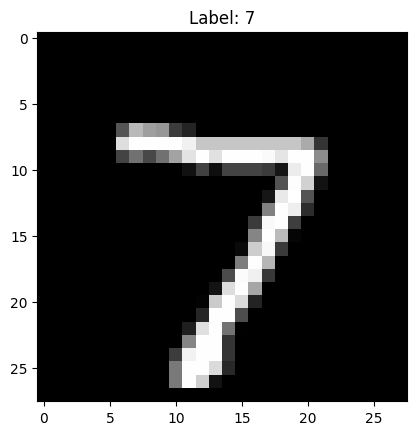

Predicted Label: 7


In [5]:
# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 훈련 및 평가

In [ ]:
# 모델 훈련
epochs = 10
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

# 결과 시각화

In [ ]:
import matplotlib.pyplot as plt

# 하나의 데이터 샘플 추출
sample_image, sample_label = test_dataset[0]

# 이미지 출력
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Label: {sample_label}")
plt.show()

# 모델 예측
sample_image = sample_image.to(device)
model.eval()
with torch.no_grad():
    prediction = model(sample_image.unsqueeze(0))
    predicted_label = torch.argmax(prediction, 1).item()

print(f"Predicted Label: {predicted_label}")